In [1]:
from pils.loader.path import PathLoader
from pils.loader.stout import StoutLoader
from pils.flight import Flight

import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt

# PATH LOADER

How to use the path data loader

In [5]:
base_path = "/mnt/data/POLOCALC"
loader = PathLoader(base_path)
flights = loader.load_all_flights()

2026-02-10 16:43:06,679 - pils.loader.path - INFO - Loading all flights from all campaigns...
2026-02-10 16:43:06,680 - pils.loader.path - WARNING - Could not build flight dict for calibration  /mnt/data/POLOCALC/campaigns/202412/20241215/calibration : time data 'tion ' does not match format '%Y%m%d_%H%M'
2026-02-10 16:43:06,681 - pils.loader.path - WARNING - Could not build flight dict for Store-V2 /mnt/data/POLOCALC/campaigns/202412/.Spotlight-V100/Store-V2: time data '2' does not match format '%Y%m%d_%H%M'
2026-02-10 16:43:06,682 - pils.loader.path - WARNING - Could not build flight dict for 24_12_17 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_17: time data '7' does not match format '%Y%m%d_%H%M'
2026-02-10 16:43:06,682 - pils.loader.path - WARNING - Could not build flight dict for 24_12_18 /mnt/data/POLOCALC/campaigns/202412/calibration_PUC/24_12_18: time data '8' does not match format '%Y%m%d_%H%M'
2026-02-10 16:43:06,682 - pils.loader.path - WARNING - Could not buil

In [3]:
flights

[{'campaign_name': '202412',
  'flight_name': 'flight_20241215_1903',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T19:03:00+00:00',
  'landing_datetime': '2024-12-15T19:03:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_1903/proc'},
 {'campaign_name': '202412',
  'flight_name': 'flight_20241215_2055',
  'flight_date': '20241215',
  'takeoff_datetime': '2024-12-15T20:55:00+00:00',
  'landing_datetime': '2024-12-15T20:55:00+00:00',
  'drone_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/drone',
  'aux_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20241215_2055/aux',
  'processed_data_folder_path': '/mnt/data/POLOCALC/campaigns/202412/20241215/flight_20

# STOUT LOADER

How to use the stout data loader

In [2]:
stout_loader = StoutLoader()

flight_meta = stout_loader.load_single_flight(flight_name="flight_20251201_1515")



2026-02-16 16:47:08.392 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 16:47:08 - stout - WARNING - [authenticated_user] - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-02-16 16:47:08,242 - stout - WARNING - Cannot write to log directory /mnt/data/POLOCALC/logs: [Errno 13] Permission denied: '/mnt/data/POLOCALC/logs/stout.log'. Using console logging only.
2026-02-16 16:47:08.393 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 16:47:08 - stout - INFO - [authenticated_user] - Centralized logging system initialized
2026-02-16 16:47:08,394 - pils.loader.stout - INFO - Initialized with stout database, base path: /mnt/data/POLOC

# Create a Flight 

How to create a flight object, adding data to it and synchronize the sensors

In [3]:
flight = Flight(flight_meta)
flight.add_sensor_data(['gps', 'inclinometer', 'adc'])
flight.add_drone_data()

2026-02-16 16:47:11,113 - pils.sensors.inclinometer - INFO - Inclinometer sensor type: imx5
2026-02-16 16:47:15,000 - pils.drones.DJIDrone - INFO - Tick unwrap at index 4009: 4,294,296,476 -> 206,394 (adding offset 2^32, total offset: 4,294,967,296)
2026-02-16 16:47:15,001 - pils.drones.DJIDrone - INFO - Loaded 7114 GPS messages from DAT file
2026-02-16 16:47:15,010 - pils.drones.DJIDrone - INFO - Tick unwrap at index 3705: 4,294,110,891 -> 43,735 (adding offset 2^32, total offset: 4,294,967,296)
2026-02-16 16:47:15,010 - pils.drones.DJIDrone - INFO - Loaded 6625 RTK messages from DAT file
2026-02-16 16:47:15,126 - pils.drones.DJIDrone - INFO - Converting timestamps to milliseconds


In [4]:
flight.sync()

2026-02-16 16:47:15,166 - pils.synchronizer - INFO - Set GPS payload reference with 1439 samples
2026-02-16 16:47:15,166 - pils.synchronizer - INFO - Added drone GPS with 13608 samples
2026-02-16 16:47:15,169 - pils.synchronizer - INFO - Added litchi GPS with 5906 samples
2026-02-16 16:47:15,169 - pils.synchronizer - INFO - Added inclinometer with 102789 samples
2026-02-16 16:47:15,169 - pils.synchronizer - INFO - Added payload sensor 'adc' with 1150021 samples
2026-02-16 16:47:15,169 - pils.synchronizer - INFO - Detecting drone GPS offset via NED correlation...
/home/gabriele/Documents/data_loader/pils/synchronizer.py:193: RuntimeWarning: overflow encountered in scalar multiply
  east = R * dlon * np.cos(ref_lat_rad)
/home/gabriele/Documents/data_loader/pils/synchronizer.py:309: RuntimeWarning: overflow encountered in square
  velocity_horizontal = np.sqrt(de**2 + dn**2) / dt
2026-02-16 16:47:15,204 - pils.synchronizer - INFO - Drone GPS offset: 0.647s (corr=1.000)
2026-02-16 16:47:15

{'drone': shape: (7_191, 42)
 ┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
 │ tick     ┆ msg_type  ┆ GPS:date  ┆ GPS:time  ┆ … ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:pos_f ┆ RTK:gps_s │
 │ ---      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ lg_3      ┆ lg_4      ┆ lg_5      ┆ tate      │
 │ f64      ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
 │          ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
 ╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
 │ 4.1462e9 ┆ 26403.520 ┆ 2.0251201 ┆ 151418.35 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │          ┆ 817       ┆ e7        ┆ 2682      ┆   ┆           ┆           ┆           ┆           │
 │ 4.1463e9 ┆ 33295.699 ┆ 2.0251201 ┆ 151418.45 ┆ … ┆ 50.0      ┆ 50.0      ┆ 0.0       ┆ 0.0       │
 │          ┆ 428       ┆ e7        ┆ 2682      ┆   ┆

## Comparison before and after synchronization for the GPS

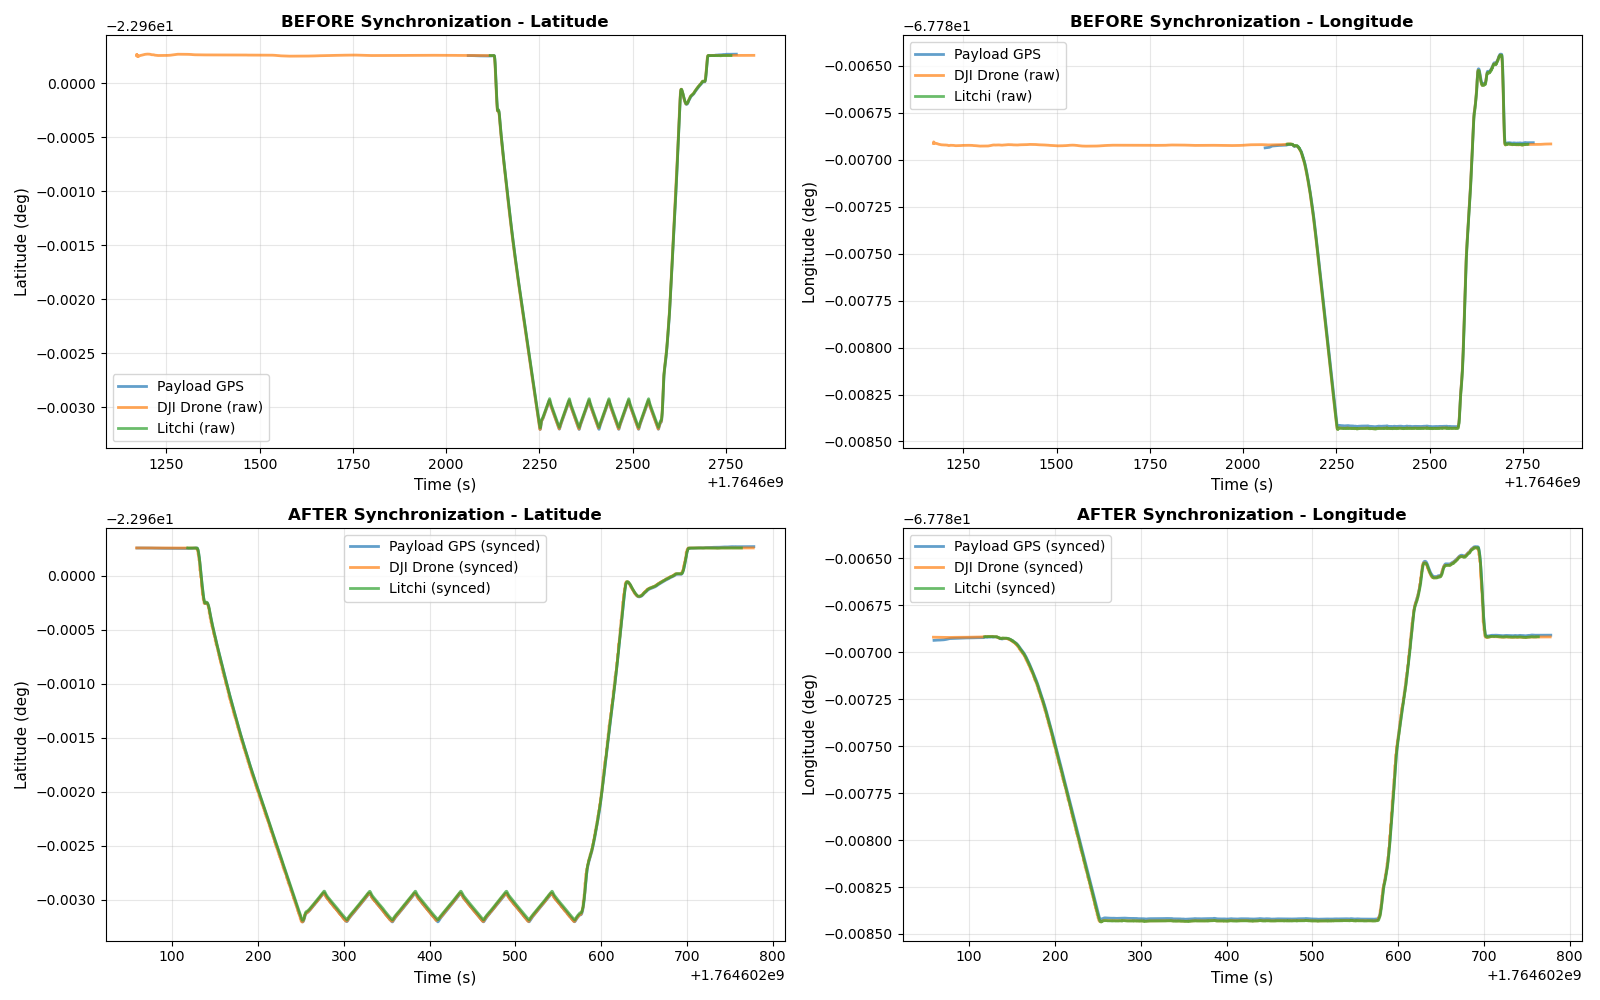

In [12]:

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# BEFORE SYNC - Latitude
axes[0, 0].plot(
    flight.raw_data.payload_data.gps['unix_time_ms']/1e3,
    flight.raw_data.payload_data.gps['posllh_lat'],
    label='Payload GPS', alpha=0.7, linewidth=2
)
axes[0, 0].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"],
    flight.raw_data.drone_data.drone["GPS:latitude"],
    label='DJI Drone (raw)', alpha=0.7, linewidth=2
)
axes[0, 0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"]/1e3,
    flight.raw_data.drone_data.litchi["latitude"],
    label='Litchi (raw)', alpha=0.7, linewidth=2
)
axes[0, 0].set_xlabel('Time (s)', fontsize=11)
axes[0, 0].set_ylabel('Latitude (deg)', fontsize=11)
axes[0, 0].set_title('BEFORE Synchronization - Latitude', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# BEFORE SYNC - Longitude
axes[0, 1].plot(
    flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
    flight.raw_data.payload_data.gps['posllh_lon'], 
    label='Payload GPS', alpha=0.7, linewidth=2
)
axes[0, 1].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"], 
    flight.raw_data.drone_data.drone["GPS:longitude"], 
    label='DJI Drone (raw)', alpha=0.7, linewidth=2
)
axes[0, 1].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"]/1e3, 
    flight.raw_data.drone_data.litchi["longitude"], 
    label='Litchi (raw)', alpha=0.7, linewidth=2
)
axes[0, 1].set_xlabel('Time (s)', fontsize=11)
axes[0, 1].set_ylabel('Longitude (deg)', fontsize=11)
axes[0, 1].set_title('BEFORE Synchronization - Longitude', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# AFTER SYNC - Latitude
sync_data = flight.sync_data
axes[1, 0].plot(
    sync_data['reference_gps']['timestamp'],
    sync_data['reference_gps']['posllh_lat'],
    label='Payload GPS (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].plot(
    sync_data['drone']['timestamp'],
    sync_data['drone']['GPS:latitude'],
    label='DJI Drone (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].plot(
    sync_data['litchi']['timestamp'],
    sync_data['litchi']['latitude'],
    label='Litchi (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].set_xlabel('Time (s)', fontsize=11)
axes[1, 0].set_ylabel('Latitude (deg)', fontsize=11)
axes[1, 0].set_title('AFTER Synchronization - Latitude', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# AFTER SYNC - Longitude
axes[1, 1].plot(
    sync_data['reference_gps']['timestamp'],
    sync_data['reference_gps']['posllh_lon'],
    label='Payload GPS (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].plot(
    sync_data['drone']['timestamp'],
    sync_data['drone']['GPS:longitude'],
    label='DJI Drone (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].plot(
    sync_data['litchi']['timestamp'],
    sync_data['litchi']['longitude'],
    label='Litchi (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].set_xlabel('Time (s)', fontsize=11)
axes[1, 1].set_ylabel('Longitude (deg)', fontsize=11)
axes[1, 1].set_title('AFTER Synchronization - Longitude', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
sync_data['reference_gps']

unix_time_ms,posecef_ecefX,posecef_ecefY,posecef_ecefZ,posecef_msgmode,posecef_pAcc,datetime_relative,posllh_hAcc,posllh_hMSL,posllh_height,posllh_lat,posllh_lon,posllh_msgmode,posllh_vAcc,clock_clkB,clock_clkD,clock_fAcc,clock_msgmode,clock_tAcc,datetime,timestamp
i64,i64,i64,i64,i64,i64,datetime[μs],i64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,datetime[ms],f64
1764602059000,222317927,-544418616,-247463601,0,654,2025-12-01 15:14:18.223,3616,5149651,5181.113,-22.959743,-67.786937,0,5451,596168,250,422,0,11,2025-12-01 15:14:19,1.7646e9
1764602059500,222317931,-544418617,-247463603,0,626,2025-12-01 15:14:18.723,3438,5149685,5181.147,-22.959743,-67.786937,0,5227,596293,250,389,0,11,2025-12-01 15:14:19.500,1.7646e9
1764602060000,222317934,-544418620,-247463605,0,601,2025-12-01 15:14:19.223,3286,5149725,5181.187,-22.959743,-67.786937,0,5032,596419,251,378,0,10,2025-12-01 15:14:20,1.7646e9
1764602060500,222317937,-544418622,-247463607,0,579,2025-12-01 15:14:19.723,3150,5149763,5181.225,-22.959743,-67.786937,0,4856,596544,250,399,0,10,2025-12-01 15:14:20.500,1.7646e9
1764602061000,222317940,-544418625,-247463609,0,559,2025-12-01 15:14:20.223,3031,5149802,5181.265,-22.959743,-67.786936,0,4697,596669,250,412,0,10,2025-12-01 15:14:21,1.7646e9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1764602776000,222318151,-544418414,-247463399,0,137,2025-12-01 15:26:15.223,670,5147922,5179.384,-22.95973,-67.78691,0,1200,743753,219,295,0,3,2025-12-01 15:26:16,1.7646e9
1764602776500,222318151,-544418414,-247463399,0,137,2025-12-01 15:26:15.723,671,5147918,5179.38,-22.95973,-67.78691,0,1200,743863,219,288,0,3,2025-12-01 15:26:16.500,1.7646e9
1764602777000,222318151,-544418414,-247463398,0,137,2025-12-01 15:26:16.223,671,5147919,5179.381,-22.95973,-67.78691,0,1200,743973,220,284,0,3,2025-12-01 15:26:17,1.7646e9


## Comparison before and after synchronization using pitch for the Inclinometer

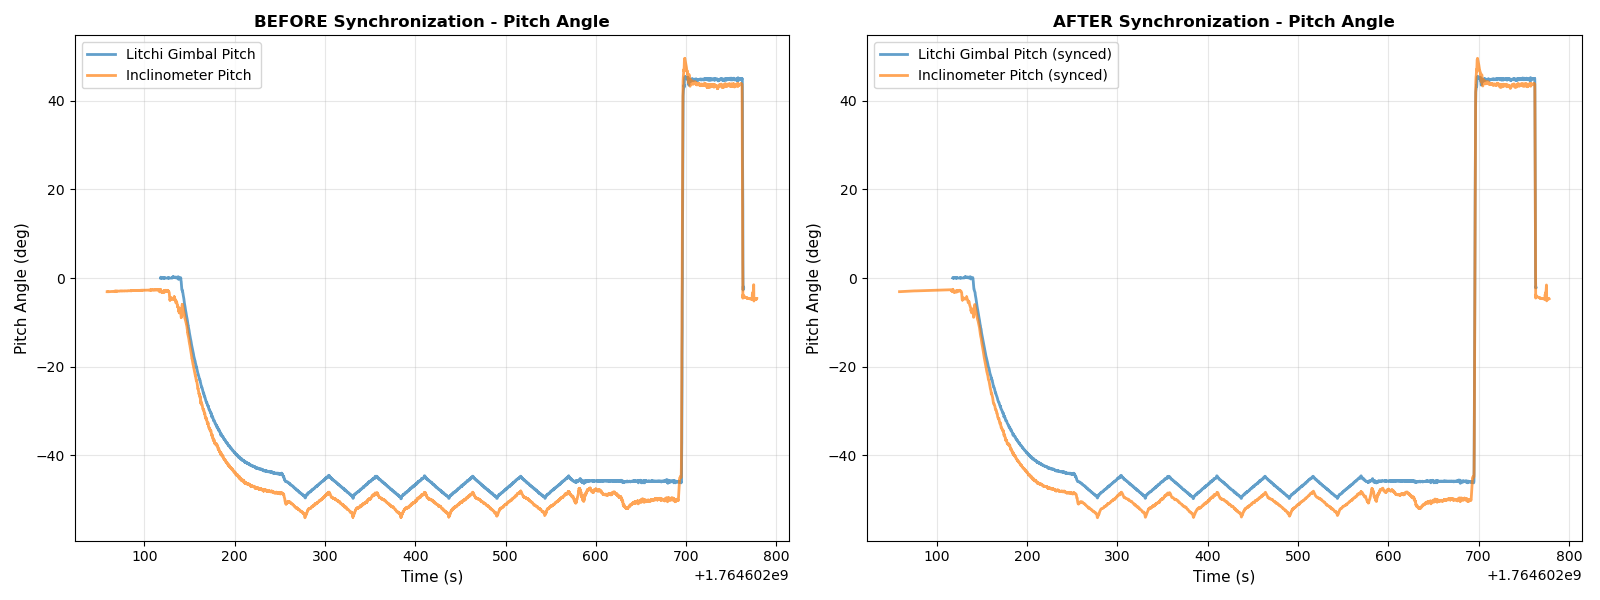

In [12]:
import numpy as np
# Inclinometer Pitch Angle - Before and After Synchronization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE SYNC - Pitch Angle
axes[0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"]/1e3,
    flight.raw_data.drone_data.litchi["gimbalPitch"],
    label='Litchi Gimbal Pitch', alpha=0.7, linewidth=2
)
axes[0].plot(
    flight.raw_data.payload_data['inclinometer']['INS']["timestamp"],
    flight.raw_data.payload_data['inclinometer']['INS']["pitch"],
    label='Inclinometer Pitch', alpha=0.7, linewidth=2
)
axes[0].set_xlabel('Time (s)', fontsize=11)
axes[0].set_ylabel('Pitch Angle (deg)', fontsize=11)
axes[0].set_title('BEFORE Synchronization - Pitch Angle', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# AFTER SYNC - Pitch Angle
sync_data = flight.sync_data
axes[1].plot(
    sync_data['timestamp'],
    sync_data['litchi_gps_gimbalPitch'],
    label='Litchi Gimbal Pitch (synced)', alpha=0.7, linewidth=2
)
axes[1].plot(
    sync_data['timestamp'],
    sync_data['inclinometer_pitch'],
    label='Inclinometer Pitch (synced)', alpha=0.7, linewidth=2
)
axes[1].set_xlabel('Time (s)', fontsize=11)
axes[1].set_ylabel('Pitch Angle (deg)', fontsize=11)
axes[1].set_title('AFTER Synchronization - Pitch Angle', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Synchronization comparison using RTK data

In [15]:
flight.sync(use_rtk_data=True)

2026-02-05 17:21:45,815 - pils.synchronizer - INFO - Set GPS payload reference with 1439 samples
2026-02-05 17:21:45,815 - pils.synchronizer - INFO - Added drone GPS with 13608 samples
2026-02-05 17:21:45,821 - pils.synchronizer - INFO - Added litchi GPS with 5906 samples
2026-02-05 17:21:45,821 - pils.synchronizer - INFO - Added inclinometer with 102789 samples
2026-02-05 17:21:45,821 - pils.synchronizer - INFO - Detecting drone GPS offset via NED correlation...
2026-02-05 17:21:45,866 - pils.synchronizer - INFO - Drone GPS offset: 0.647s (corr=1.000)
2026-02-05 17:21:45,866 - pils.synchronizer - INFO - Detecting litchi GPS offset via NED correlation...
2026-02-05 17:21:45,891 - pils.synchronizer - INFO - Litchi GPS offset: -0.123s (corr=1.000)
2026-02-05 17:21:45,891 - pils.synchronizer - INFO - Detecting inclinometer offset via pitch correlation...
2026-02-05 17:21:45,894 - pils.synchronizer - INFO - Inclinometer offset (relative to Litchi): 0.298s (corr=0.999)
2026-02-05 17:21:45,8

OK


timestamp,payload_gps_unix_time_ms,payload_gps_posecef_ecefX,payload_gps_posecef_ecefY,payload_gps_posecef_ecefZ,payload_gps_posecef_msgmode,payload_gps_posecef_pAcc,payload_gps_datetime_relative,payload_gps_posllh_hAcc,payload_gps_posllh_hMSL,payload_gps_posllh_height,payload_gps_posllh_lat,payload_gps_posllh_lon,payload_gps_posllh_msgmode,payload_gps_posllh_vAcc,payload_gps_clock_clkB,payload_gps_clock_clkD,payload_gps_clock_fAcc,payload_gps_clock_msgmode,payload_gps_clock_tAcc,payload_gps_datetime,drone_gps_tick,drone_gps_msg_type,drone_gps_GPS:date,drone_gps_GPS:time,drone_gps_GPS:longitude,drone_gps_GPS:latitude,drone_gps_GPS:heightMSL,drone_gps_GPS:velN,drone_gps_GPS:velE,drone_gps_GPS:velD,drone_gps_GPS:hdop,drone_gps_GPS:pdop,drone_gps_GPS:hacc,drone_gps_GPS:sacc,drone_gps_GPS:numGPS,drone_gps_GPS:numGLN,…,litchi_gps_velocityZ(mps),litchi_gps_pitch(deg),litchi_gps_roll(deg),litchi_gps_yaw(deg),litchi_gps_isflying,litchi_gps_batteryTemperature,litchi_gps_pitchRaw,litchi_gps_rollRaw,litchi_gps_yawRaw,litchi_gps_gimbalPitchRaw,litchi_gps_gimbalRollRaw,litchi_gps_gimbalYawRaw,litchi_gps_datetime,litchi_gps_unix_time_ms,litchi_gps_gimbalPitch,inclinometer_monotonic_ns,inclinometer_timestamp_ns,inclinometer_lat_deg,inclinometer_lon_deg,inclinometer_week,inclinometer_timeOfWeek_s,inclinometer_insStatus,inclinometer_hdwStatus,inclinometer_alt_m,inclinometer_roll_rad,inclinometer_pitch_rad,inclinometer_yaw_rad,inclinometer_vel_U_m_s,inclinometer_vel_V_m_s,inclinometer_vel_W_m_s,inclinometer_ned_N_m,inclinometer_ned_E_m,inclinometer_ned_D_m,inclinometer_roll,inclinometer_pitch,inclinometer_yaw,inclinometer_datetime
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.7646e9,1.7646e12,2.22317927e8,-5.4442e8,-2.4746e8,0.0,654.0,1.7646e15,3616.0,5.149651e6,5181.113,-22.959743,-67.786937,0.0,5451.0,596168.0,250.0,422.0,0.0,11.0,1.7646e12,4.1462e9,25443.674975,2.0251201e7,151418.338756,-67.78692,-22.959742,5150.764,-0.006612,0.0,0.0,61.0,117.0,3.0,851.0,8.0,9.0,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6730e7,1.7646e18,0.0,0.0,1.0,38.556624,329745.0,3.3554435e7,0.0,0.064322,-0.053758,2.154188,0.0,0.0,0.0,0.0,0.0,0.0,3.685367,-3.080096,123.425893,1.7646e18
1.7646e9,1.7646e12,2.2232e8,-5.4442e8,-2.4746e8,0.0,648.400005,1.7646e15,3580.400034,5.1497e6,5181.1198,-22.959743,-67.786937,0.0,5406.200043,596192.999976,250.0,415.400006,0.0,11.0,1.7646e12,4.1466e9,34064.779778,2.0251201e7,151418.838694,-67.78692,-22.959742,5150.764,-0.001613,0.0,0.0,61.0,117.0,3.0,851.0,8.0,9.0,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6673e8,1.7646e18,0.0,0.0,1.0,38.656652,329745.0,3.3554435e7,0.0,0.064364,-0.053816,2.15413,0.0,0.0,0.0,0.0,0.0,0.0,3.687805,-3.083453,123.422533,1.7646e18
1.7646e9,1.7646e12,2.2232e8,-5.4442e8,-2.4746e8,0.0,642.799997,1.7646e15,3544.799983,5.1497e6,5181.1266,-22.959743,-67.786937,0.0,5361.399979,596218.000012,250.0,408.799997,0.0,11.0,1.7646e12,4.1471e9,25433.113963,2.0251201e7,151419.0,-67.78692,-22.959742,5150.763657,-0.003427,-0.003427,0.0,61.0,117.0,3.0,851.0,8.0,9.0,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6673e8,1.7646e18,0.0,0.0,1.0,38.756654,329745.0,3.3554435e7,0.0,0.064295,-0.053727,2.154071,0.0,0.0,0.0,0.0,0.0,0.0,3.683822,-3.078348,123.419202,1.7646e18
1.7646e9,1.7646e12,2.2232e8,-5.4442e8,-2.4746e8,0.0,637.200003,1.7646e15,3509.200017,5.1497e6,5181.1334,-22.959743,-67.786937,0.0,5316.600021,596242.999988,250.0,402.200003,0.0,11.0,1.7646e12,4.1475e9,33164.489075,2.0251201e7,151419.0,-67.78692,-22.959742,5150.763151,-0.008487,-0.008487,0.0,61.0,117.0,3.0,851.0,8.0,9.0,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6673e8,1.7646e18,0.0,0.0,1.0,38.856631,329745.0,3.3554435e7,0.0,0.064232,-0.053734

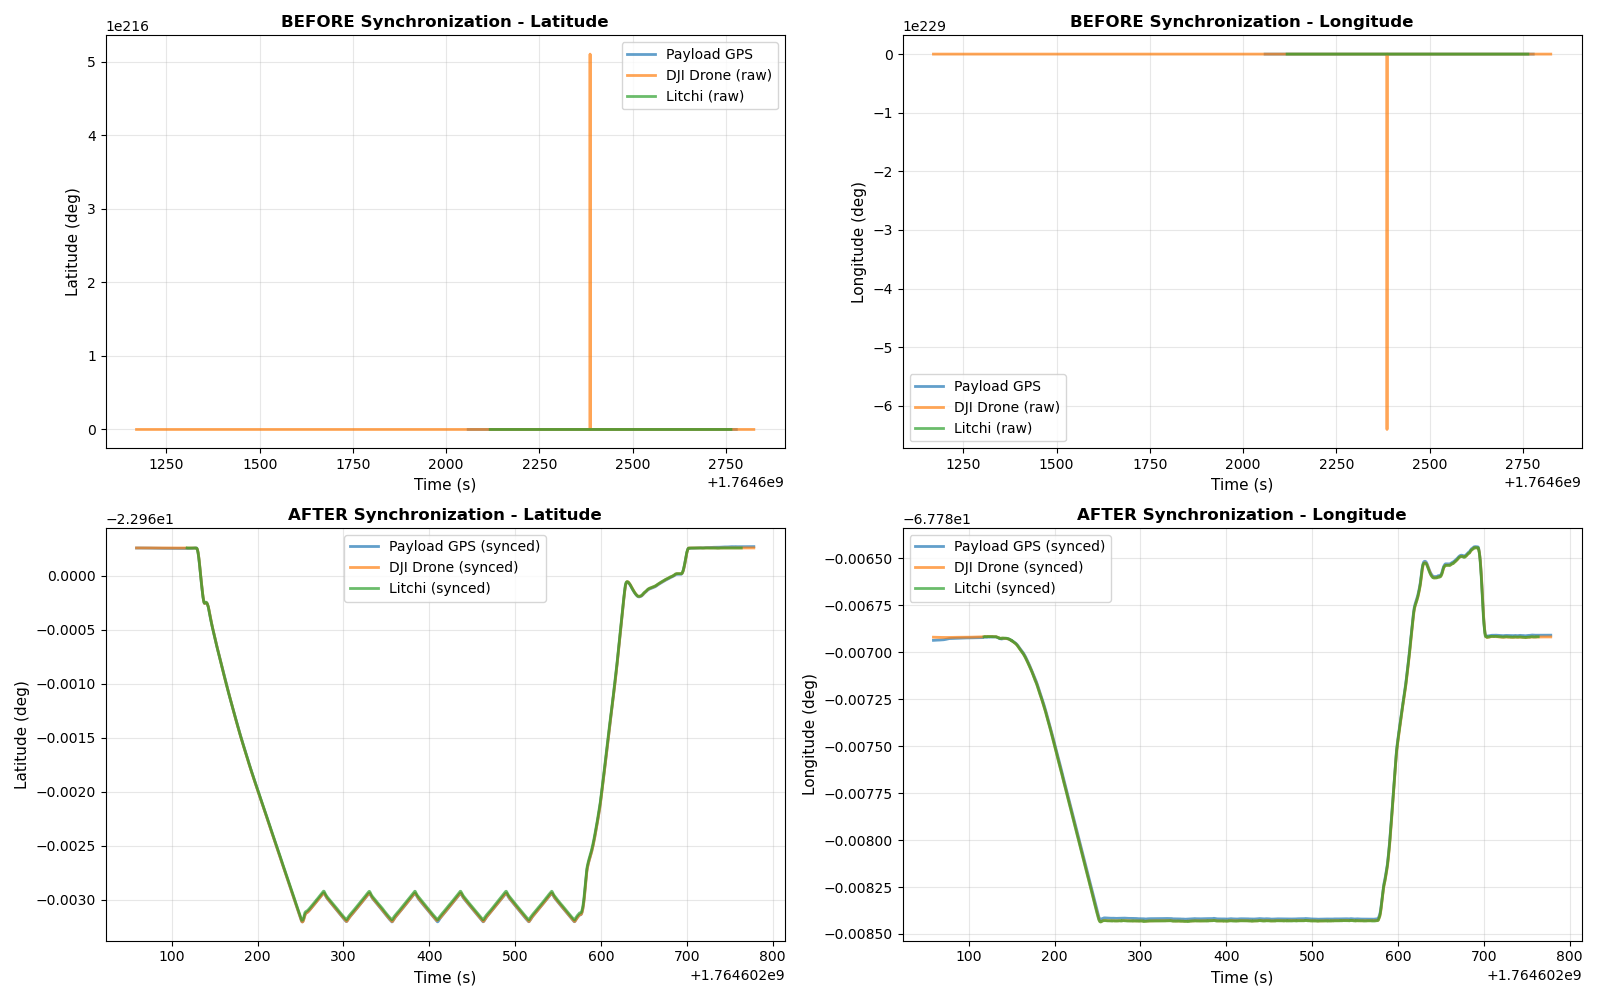

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# BEFORE SYNC - Latitude
axes[0, 0].plot(
    flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
    flight.raw_data.payload_data.gps['posllh_lat'], 
    label='Payload GPS', alpha=0.7, linewidth=2
)
axes[0, 0].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"], 
    flight.raw_data.drone_data.drone["RTK:lat_p"], 
    label='DJI Drone (raw)', alpha=0.7, linewidth=2
)
axes[0, 0].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"]/1e3, 
    flight.raw_data.drone_data.litchi["latitude"], 
    label='Litchi (raw)', alpha=0.7, linewidth=2
)
axes[0, 0].set_xlabel('Time (s)', fontsize=11)
axes[0, 0].set_ylabel('Latitude (deg)', fontsize=11)
axes[0, 0].set_title('BEFORE Synchronization - Latitude', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# BEFORE SYNC - Longitude
axes[0, 1].plot(
    flight.raw_data.payload_data.gps['unix_time_ms']/1e3, 
    flight.raw_data.payload_data.gps['posllh_lon'], 
    label='Payload GPS', alpha=0.7, linewidth=2
)
axes[0, 1].plot(
    flight.raw_data.drone_data.drone["correct_timestamp"], 
    flight.raw_data.drone_data.drone["RTK:lon_p"], 
    label='DJI Drone (raw)', alpha=0.7, linewidth=2
)
axes[0, 1].plot(
    flight.raw_data.drone_data.litchi["unix_time_ms"]/1e3, 
    flight.raw_data.drone_data.litchi["longitude"], 
    label='Litchi (raw)', alpha=0.7, linewidth=2
)
axes[0, 1].set_xlabel('Time (s)', fontsize=11)
axes[0, 1].set_ylabel('Longitude (deg)', fontsize=11)
axes[0, 1].set_title('BEFORE Synchronization - Longitude', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# AFTER SYNC - Latitude
sync_data = flight.sync_data
axes[1, 0].plot(
    sync_data['timestamp'],
    sync_data['payload_gps_posllh_lat'],
    label='Payload GPS (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].plot(
    sync_data['timestamp'],
    sync_data['drone_gps_GPS:latitude'],
    label='DJI Drone (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].plot(
    sync_data['timestamp'],
    sync_data['litchi_gps_latitude'],
    label='Litchi (synced)', alpha=0.7, linewidth=2
)
axes[1, 0].set_xlabel('Time (s)', fontsize=11)
axes[1, 0].set_ylabel('Latitude (deg)', fontsize=11)
axes[1, 0].set_title('AFTER Synchronization - Latitude', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# AFTER SYNC - Longitude
axes[1, 1].plot(
    sync_data['timestamp'],
    sync_data['payload_gps_posllh_lon'],
    label='Payload GPS (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].plot(
    sync_data['timestamp'],
    sync_data['drone_gps_GPS:longitude'],
    label='DJI Drone (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].plot(
    sync_data['timestamp'],
    sync_data['litchi_gps_longitude'],
    label='Litchi (synced)', alpha=0.7, linewidth=2
)
axes[1, 1].set_xlabel('Time (s)', fontsize=11)
axes[1, 1].set_ylabel('Longitude (deg)', fontsize=11)
axes[1, 1].set_title('AFTER Synchronization - Longitude', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
